In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('card_transdata.csv')
df.head(10)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0.0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0.0
7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0.0
8,0.876632,2.503609,1.516999,0.0,0.0,0.0,0.0,0.0
9,8.839047,2.970512,2.361683,1.0,0.0,0.0,1.0,0.0


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [5]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [6]:
# Convert float columns to Integer.
key= ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud']
for i in df[key].columns:
    df[i] = df[i].astype(int)

In [7]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  int32  
 4   used_chip                       1000000 non-null  int32  
 5   used_pin_number                 1000000 non-null  int32  
 6   online_order                    1000000 non-null  int32  
 7   fraud                           1000000 non-null  int32  
dtypes: float64(3), int32(5)
memory usage: 42.0 MB


### Visualize Target Variable Class Counts

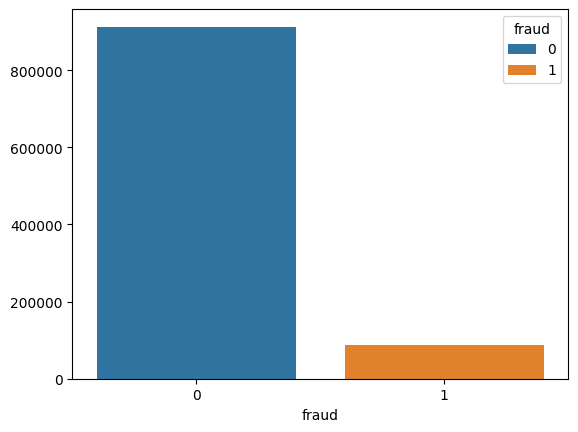

In [9]:
vals= df['fraud'].value_counts()
sns.barplot(x=vals.index, y=vals.values, hue=vals.index , legend=True)
plt.show()

In [10]:
df['fraud'].value_counts()

fraud
0    912597
1     87403
Name: count, dtype: int64

### We have a major class imbalance in our target variable, this will result in any model predicting class 0 quite well but class 1 not so well. We will test this on our models below.

### We can see that class 0 has over 900k instances but class 1 has less than 100k instances. We can oversample the fraud variable class 1 but this may also result in our model overfitting later on when you consider the amount of rows of data that we have. For now we will leave the data as it is to see how our model performs on the test data.

## Dimension Reduction & Feature Selection

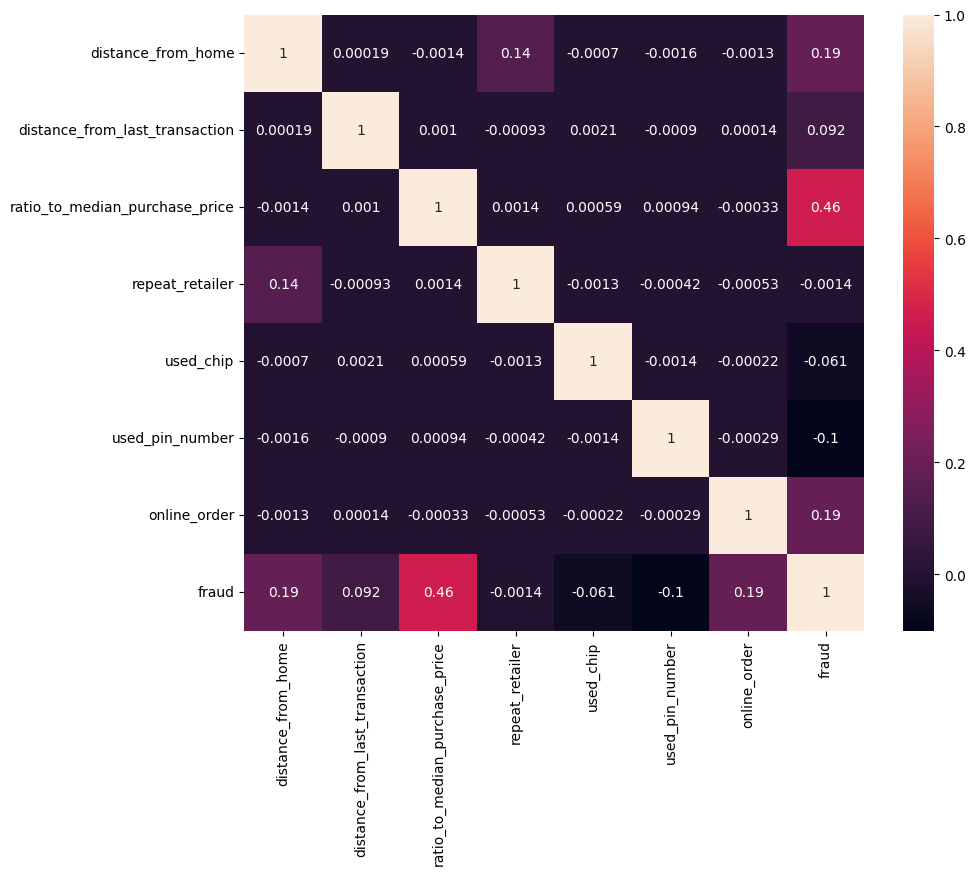

In [11]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

#### From the correlation heatmap above, I feel that the features "repeat_retailer" and "used_chip" have very low correlations with our target variables so I am choosing to drop them from our dataframe.

In [12]:
df = df.drop(['repeat_retailer','used_chip'], axis=1)

# Model Building 

## We dont really need to scale our input features for now.

# Logistic Regression Model:

In [13]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [14]:
features = ['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price',
       'used_pin_number', 'online_order']
target = 'fraud'

X = df[features]
y = df[target]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
log = LogisticRegression(max_iter=800)
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

classification = classification_report(y_test, y_pred)
print(classification)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98    182557
           1       0.88      0.58      0.70     17443

    accuracy                           0.96    200000
   macro avg       0.92      0.79      0.84    200000
weighted avg       0.95      0.96      0.95    200000



### The logistic Regression model performs as expected when looking at the recall and f1-score of Class 1. This is due to the imbalance of classes in our data. As I stated earlier, we could over or undersample the data but this may cause overfitting when using the model on our test data. Overall the model performs really well with an accuracy score of 96%.

# Decision Tree Classifier Model:

In [17]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

classification = classification_report(y_test, y_pred)
print(classification)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    182557
           1       0.90      0.91      0.91     17443

    accuracy                           0.98    200000
   macro avg       0.95      0.95      0.95    200000
weighted avg       0.98      0.98      0.98    200000



### The decision tree model performs really well on both class 0 and class 1 regardless of the imbalance in the data. Both classes have relatively high recall and f1-scores and well as the model having a 98% accuracy overall.

# XGBoost Classfier Model:

In [18]:
from xgboost import XGBClassifier

In [19]:
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)

classification = classification_report(y_test, y_pred)
print(classification)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    182557
           1       0.87      0.97      0.92     17443

    accuracy                           0.98    200000
   macro avg       0.93      0.98      0.95    200000
weighted avg       0.99      0.98      0.98    200000



### The XGBoostClassifier model performs similarly to our Decision Tree Model. Although this model seems to have a higher recall and f1-score when it classifies class 1 but overall the model achieves the same accuracy score as the Decision Tree Model. 

## Overall the Decision Tree Classifier would be my go too model due to the fact that it has a balanced precision, recall and f1-score when predicting if a transaction is fraud or not.